# ANALYZE DATA WITH PANDAS

In [115]:
import pandas as pd 

df = pd.read_csv("fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


## EASY

In [116]:
# EASY: How many unique customers are in the dataset?
customers = df["customer_id"]
customers_count = len(set(customers))
print("Number of unique customers:", customers_count)

Number of unique customers: 5191


In [117]:
# EASY: What are the different categories of products available? How many unique categories are there?
product_categories = df["category"]
category_count = len(set(product_categories))
print("Categories:",set(product_categories))
print("Number of categories:", category_count)

Categories: {'Cosmetics', 'Shoes', 'Food & Beverage', 'Toys', 'Souvenir', 'Technology', 'Books', 'Clothing'}
Number of categories: 8


In [118]:
# EASY: Which payment method is the most popular? How many times was it used?
count = df['payment_method'].value_counts()
print(count)

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


## MEDIUM

In [119]:
# MEDIUM: What are the three most popular categories, by total sales?
df["revenue"] = df["price"] * df["quantity"]
amount = df.groupby("category")["revenue"].sum().sort_values(ascending=False)
amount.head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: revenue, dtype: float64

In [120]:
# MEDIUM: What are the total sales attributed to customers over the age of 45?
import pandas as pd 

df1 = pd.read_json("dim_customer.json")

df1

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [121]:
df1["over_45"] = " " 
df1.loc[df1["age"] > 45.0, "over_45"] = True
count_true = df1['over_45'].value_counts()
print(count_true)

        3536
True    1655
Name: over_45, dtype: int64


In [122]:
df2 = pd.merge(df,df1,left_on = "customer_id", right_on = "id")

age_45 = df2[df2["age"] >= 45]

print(age_45["revenue"].sum())

84307291.82000001


/var/folders/fr/32rmd99516qdnxs8nwkb8vfm0000gn/T/ipykernel_614/3066988805.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


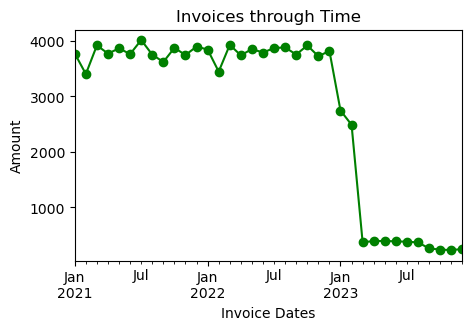

In [123]:
# MEDIUM: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import pandas as pd
import matplotlib.pyplot as plt


df['invoice_date'] = pd.to_datetime(df['invoice_date'])  

count_per_month = df.groupby(df['invoice_date'].dt.to_period('M')).size()

plt.figure(figsize=(5,3))
count_per_month.plot(kind='line', marker='o',color="g")
plt.xlabel('Invoice Dates')
plt.ylabel('Amount')
plt.title('Invoices through Time')
plt.show()

## HARD

In [124]:
# HARD: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [125]:
print("Max:",df1["age"].max())
print("Min:",df1["age"].min())

Max: 85.0
Min: 18.0


In [126]:
df2["age_range"] = ""

df2.loc[df2["age"].between(10,19), "age_range"] = "10-19" #21-25
df2.loc[df2["age"].between(20,29), "age_range"] = "20-29" #26-30
df2.loc[df2["age"].between(30,39), "age_range"] = "30-39" #31-35
df2.loc[df2["age"].between(40,49), "age_range"] = "40-49" #36-40
df2.loc[df2["age"].between(50,59), "age_range"] = "50-59" #41-45
df2.loc[df2["age"].between(60,69), "age_range"] = "60-69" #46-50
df2.loc[df2["age"].between(70,79), "age_range"] = "70-79" #51-55
df2.loc[df2["age"].between(80,89), "age_range"] = "80-89" #56-60

df2.head(40)

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,revenue,age,first_name,gender,id,last_name,over_45,age_range
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson,,
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson,,
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson,,
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson,,
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson,,
5,I208592,229,Cosmetics,4,162.64,Cash,7/1/2023,Emaar Square Mall,650.56,NaN,William,M,229,Anderson,,
6,I321236,229,Souvenir,3,35.19,Cash,5/3/2023,Metropol AVM,105.57,NaN,William,M,229,Anderson,,
7,I312496,229,Cosmetics,4,162.64,Credit Card,15/02/2023,Kanyon,650.56,NaN,William,M,229,Anderson,,
8,I778140,229,Souvenir,1,11.73,Debit Card,16/06/2021,Istinye Park,11.73,NaN,William,M,229,Anderson,,
9,I303334,229,Shoes,1,600.17,Cash,19/04/2022,Kanyon,600.17,NaN,William,M,229,Anderson,,


In [128]:
import pandas as pd

pivot_table = df2.pivot_table(index="category",columns="age_range", values="revenue", aggfunc="sum")

pivot_table

age_range,,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,,
Books,334012.05,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,46003764.40,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,2777362.62,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,345875.59,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,26468097.17,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,265661.04,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,23865450.00,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,1587210.24,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
